In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2014-12-27,392.9
2014-12-28,398.0
2014-12-29,394.4


In [8]:
y_w=y.resample('M').mean()
y_w

,GHI
Date,
2000-01-31,439.535484
2000-02-29,521.564286
2000-03-31,614.280645
2000-04-30,676.533333
2000-05-31,680.429032
...,...
2014-08-31,604.667742
2014-09-30,595.120000
2014-10-31,520.051613


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-31,439.535484
2000-02-29,521.564286
2000-03-31,614.280645
2000-04-30,676.533333
2000-05-31,680.429032
...,...
2011-08-31,579.332258
2011-09-30,543.643333
2011-10-31,542.958065


In [10]:
y[:4380]

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2011-12-27,407.9
2011-12-28,408.3
2011-12-29,406.8


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(0,5474,365):
  for j in datesInYr:
    X_add = y[i:i+j]
    #print(i,j)
    X_T.append(X_add)
    i+=j
X_T=np.asarray(X_T)
X_T.shape

(180,)

In [14]:
X_T

array([array([420.4, 418.5, 423.3, 421.2, 418.1, 426.4, 416.2, 411.5, 370.4,
       411.5, 433.3, 401.6, 437.7, 424.1, 432. , 434. , 439.6, 443.1,
       444.6, 446.5, 449.3, 454.5, 468.7, 466.1, 456.8, 477.4, 468.3,
       481.7, 480.5, 481.1, 467.2]),
       array([482.1, 465.2, 489.7, 383.1, 500.2, 476.2, 502.4, 513.6, 468.5,
       387.9, 517.4, 523.3, 529. , 535.5, 530.4, 537.1, 545.2, 547.9,
       546.7, 558.8, 558.1, 566. , 568.2, 563.9, 567. , 576.9, 587. ,
       576.5]),
       array([577.3, 561.5, 574.1, 554.3, 558.1, 570.8, 582.2, 590.9, 595.6,
       602.8, 604.5, 605.3, 622.6, 623.5, 627. , 628.3, 635.4, 625. ,
       642.1, 633.4, 503.1, 535.7, 657.1, 661.4, 661.5, 667.3, 671.1,
       670.9, 658.5, 677.6, 663.8]),
       array([648.5, 641.5, 644.8, 646.3, 639.2, 655.6, 655.7, 666.6, 669.6,
       669.7, 673. , 673.9, 681.4, 683.2, 683.7, 686.8, 692.2, 689.9,
       691.7, 664.9, 594.3, 687.1, 696.7, 705.1, 706.6, 706.9, 709.2,
       709.3, 709.4, 713.2]),
       array

In [15]:
for new in X_T[0:144:12]:
  print(len(new))

31
31
31
31
31
31
31
31
31
31
31
31


In [16]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(180,)

In [17]:
foo=[x.tolist() for x in X_T[0:144:12]]
foo_1=np.array(foo)
foo_2=foo_1.reshape(12,31,1)
foo_2.shape

(12, 31, 1)

In [18]:
Y_T[j:144:12]

array([551.38064516, 573.67741935, 593.18709677, 625.35806452,
       529.95483871, 585.56129032, 566.80645161, 604.81935484,
       564.24516129, 579.33225806])

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

modelList=[]
j=0
for i in datesInYr:
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(i,1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  foo=[xd.tolist() for xd in X_T[j:144:12]]
  foo_1=np.array(foo)
  foo_1=foo_1.reshape(12,i,1)
  # fit model
  model.fit(foo_1, Y_T[j:144:12], epochs=2000, verbose=0)
  modelList.append(model)
  j+=1

In [20]:
X_T[144].shape

(31,)

In [21]:
modelList

In [22]:
# demonstrate prediction
yhat=[]

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(144,180):
  x_input = X_T[i]
  x_input = x_input.reshape(1,datesInYr[i%12],1)
  #print((i-144)%12)
  yRez = modelList[((i-144)%12)].predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[636.0122]]
[[504.4442]]
[[262.40686]]
[[734.51917]]
[[690.7675]]
[[635.46185]]
[[593.5362]]
[[541.242]]
[[396.41846]]
[[541.65]]
[[450.77045]]
[[176.30827]]
[[438.5563]]
[[454.44342]]
[[273.14255]]
[[642.5979]]
[[693.8511]]
[[650.18115]]
[[593.7341]]
[[572.4238]]
[[688.2681]]
[[524.4389]]
[[448.21176]]
[[409.94092]]
[[446.86823]]
[[472.20468]]
[[291.31677]]
[[602.211]]
[[688.549]]
[[657.9329]]
[[701.47565]]
[[616.0138]]
[[609.753]]
[[544.2907]]
[[438.52502]]
[[144.75261]]


[array([[636.0122]], dtype=float32),
 array([[504.4442]], dtype=float32),
 array([[262.40686]], dtype=float32),
 array([[734.51917]], dtype=float32),
 array([[690.7675]], dtype=float32),
 array([[635.46185]], dtype=float32),
 array([[593.5362]], dtype=float32),
 array([[541.242]], dtype=float32),
 array([[396.41846]], dtype=float32),
 array([[541.65]], dtype=float32),
 array([[450.77045]], dtype=float32),
 array([[176.30827]], dtype=float32),
 array([[438.5563]], dtype=float32),
 array([[454.44342]], dtype=float32),
 array([[273.14255]], dtype=float32),
 array([[642.5979]], dtype=float32),
 array([[693.8511]], dtype=float32),
 array([[650.18115]], dtype=float32),
 array([[593.7341]], dtype=float32),
 array([[572.4238]], dtype=float32),
 array([[688.2681]], dtype=float32),
 array([[524.4389]], dtype=float32),
 array([[448.21176]], dtype=float32),
 array([[409.94092]], dtype=float32),
 array([[446.86823]], dtype=float32),
 array([[472.20468]], dtype=float32),
 array([[291.31677]], dtype=

In [23]:
len(yhat)

36

In [24]:
y_w[144:].index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [25]:
y_w[144:]


,GHI
Date,
2012-01-31,423.648387
2012-02-29,513.546429
2012-03-31,589.893548
2012-04-30,635.430000
2012-05-31,694.035484
2012-06-30,672.626667
2012-07-31,600.554839
2012-08-31,539.393548
2012-09-30,555.456667


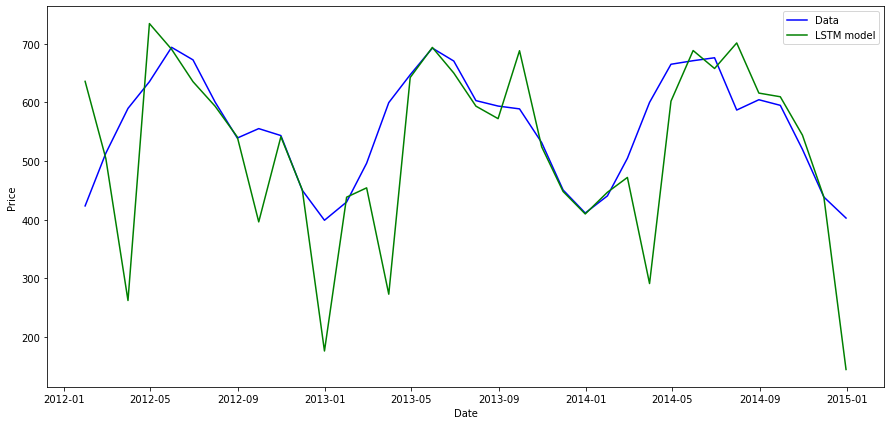

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[144:].index, y_w[144:], color= 'blue', label= 'Data')
plt.plot(y_w[144:].index,np.asarray(yhat).reshape(36,) , color= 'green', label= 'LSTM model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
WriteDF = pd.DataFrame(columns=['Date', 'GHI'])
WriteDF['Date'] = y_w[144:].index
WriteDF['GHI'] = np.asarray(yhat).reshape(36,)
WriteDF.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTM_monthly.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[144:],np.asarray(yhat).reshape(36,),squared=False)

83.43155037437472

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[144:],np.asarray(yhat).reshape(36,))

0.06812173795822037